In [67]:
# case1: 商务签违规预测
import pandas as pd
data = pd.read_csv('./case1/training_swq.csv')
data.head(5)

,Unnamed: 0,评级,商务签违规,登记备案信息_统一社会信用代码,主体基本信息_主要成员,主体基本信息_股东,国地税合并纳税情况_[2015年是否纳税],国地税合并纳税情况_[2016年是否纳税],实际经营地址预警_实际经营地址相关主体数量,开业状态_开业状态,...,登记备案信息_企业类型,登记备案信息_住所_是前海商务秘书,登记备案信息_年报情况,登记备案信息_成立日期,登记备案信息_核准日期,登记备案信息_核准日期_年月日,登记备案信息_认缴注册资本总额（万元）,登记备案信息_认缴注册资本总额（万元）_能被500整除,长期未经营_是否长期未经营,实际联系人信息_联系人姓名
0,0,B,是,91440300311714908B,3.0,2.0,是,否,8.0,无经济活动,...,有限责任公司,False,2015年度报告,2014-09-05,2017-03-10,20170310.0,5500.0,True,NaN,贺飞红
1,1,B,是,91440300MA5DPA378D,3.0,5.0,否,否,NaN,无经济活动,...,有限责任公司,True,NaN,2016-11-17,2016-11-22,20161122.0,1280.0,False,是,梁思
2,2,B,是,91440300MA5DPDYG7J,3.0,5.0,否,否,NaN,无经济活动,...,有限责任公司,True,NaN,2016-11-21,2016-11-25,20161125.0,1380.0,False,是,梁思
3,3,B,是,91440300MA5DP0EB38,3.0,5.0,否,否,NaN,无经济活动,...,有限责任公司,True,NaN,2016-11-11,2016-11-18,20161118.0,1080.0,False,是,何敏
4,4,B,是,91440300MA5DPF1W3C,3.0,5.0,否,否,NaN,无经济活动,...,有限责任公司,True,NaN,2016-11-21,2016-11-28,20161128.0,1500.0,True,是,李强华


In [2]:
#查看数据类型
data.dtypes

Unnamed: 0                       int64
评级                              object
商务签违规                           object
登记备案信息_统一社会信用代码                 object
主体基本信息_主要成员                    float64
主体基本信息_股东                      float64
国地税合并纳税情况_[2015年是否纳税]           object
国地税合并纳税情况_[2016年是否纳税]           object
实际经营地址预警_实际经营地址相关主体数量          float64
开业状态_开业状态                       object
查询次数排行_查询次数                    float64
登记备案信息_企业类型                     object
登记备案信息_住所_是前海商务秘书               object
登记备案信息_年报情况                     object
登记备案信息_成立日期                     object
登记备案信息_核准日期                     object
登记备案信息_核准日期_年月日                float64
登记备案信息_认缴注册资本总额（万元）            float64
登记备案信息_认缴注册资本总额（万元）_能被500整除       bool
长期未经营_是否长期未经营                   object
实际联系人信息_联系人姓名                   object
dtype: object

In [68]:
# 查看缺失值
data.isnull().describe()

# 查看哪些列有缺失值
data.isnull().any()

Unnamed: 0                     False
评级                             False
商务签违规                          False
登记备案信息_统一社会信用代码                 True
主体基本信息_主要成员                     True
主体基本信息_股东                       True
国地税合并纳税情况_[2015年是否纳税]           True
国地税合并纳税情况_[2016年是否纳税]           True
实际经营地址预警_实际经营地址相关主体数量           True
开业状态_开业状态                      False
查询次数排行_查询次数                     True
登记备案信息_企业类型                     True
登记备案信息_住所_是前海商务秘书               True
登记备案信息_年报情况                     True
登记备案信息_成立日期                     True
登记备案信息_核准日期                     True
登记备案信息_核准日期_年月日                 True
登记备案信息_认缴注册资本总额（万元）             True
登记备案信息_认缴注册资本总额（万元）_能被500整除    False
长期未经营_是否长期未经营                   True
实际联系人信息_联系人姓名                   True
dtype: bool

In [69]:
# 数据类型转换
def conv_type(df):
    return df.replace(to_replace=['是', '否', '有经济活动', '无经济活动', True, False], value=[1, 0,  1, 0, 1, 0])

data2 = conv_type(data)
data2.dtypes

Unnamed: 0                       int64
评级                              object
商务签违规                            int64
登记备案信息_统一社会信用代码                 object
主体基本信息_主要成员                    float64
主体基本信息_股东                      float64
国地税合并纳税情况_[2015年是否纳税]          float64
国地税合并纳税情况_[2016年是否纳税]          float64
实际经营地址预警_实际经营地址相关主体数量          float64
开业状态_开业状态                        int64
查询次数排行_查询次数                    float64
登记备案信息_企业类型                     object
登记备案信息_住所_是前海商务秘书              float64
登记备案信息_年报情况                     object
登记备案信息_成立日期                     object
登记备案信息_核准日期                     object
登记备案信息_核准日期_年月日                float64
登记备案信息_认缴注册资本总额（万元）            float64
登记备案信息_认缴注册资本总额（万元）_能被500整除      int64
长期未经营_是否长期未经营                  float64
实际联系人信息_联系人姓名                   object
dtype: object

In [71]:
# 查看数据分布

data2.describe()
data2.head(5)

,Unnamed: 0,评级,商务签违规,登记备案信息_统一社会信用代码,主体基本信息_主要成员,主体基本信息_股东,国地税合并纳税情况_[2015年是否纳税],国地税合并纳税情况_[2016年是否纳税],实际经营地址预警_实际经营地址相关主体数量,开业状态_开业状态,...,登记备案信息_企业类型,登记备案信息_住所_是前海商务秘书,登记备案信息_年报情况,登记备案信息_成立日期,登记备案信息_核准日期,登记备案信息_核准日期_年月日,登记备案信息_认缴注册资本总额（万元）,登记备案信息_认缴注册资本总额（万元）_能被500整除,长期未经营_是否长期未经营,实际联系人信息_联系人姓名
0,0,B,1,91440300311714908B,3.0,2.0,1.0,0.0,8.0,0,...,有限责任公司,0.0,2015年度报告,2014-09-05,2017-03-10,20170310.0,5500.0,1,NaN,贺飞红
1,1,B,1,91440300MA5DPA378D,3.0,5.0,0.0,0.0,NaN,0,...,有限责任公司,1.0,NaN,2016-11-17,2016-11-22,20161122.0,1280.0,0,1.0,梁思
2,2,B,1,91440300MA5DPDYG7J,3.0,5.0,0.0,0.0,NaN,0,...,有限责任公司,1.0,NaN,2016-11-21,2016-11-25,20161125.0,1380.0,0,1.0,梁思
3,3,B,1,91440300MA5DP0EB38,3.0,5.0,0.0,0.0,NaN,0,...,有限责任公司,1.0,NaN,2016-11-11,2016-11-18,20161118.0,1080.0,0,1.0,何敏
4,4,B,1,91440300MA5DPF1W3C,3.0,5.0,0.0,0.0,NaN,0,...,有限责任公司,1.0,NaN,2016-11-21,2016-11-28,20161128.0,1500.0,1,1.0,李强华


In [78]:
# 日期类型处理
def preprocess_dt_cols(df, cols, format=None):
    if not isinstance(cols, (list, tuple)):
        cols = list(cols)
    for col in cols:
        s_dt = pd.to_datetime(df[col], format=format)
        df[col + '_year'] = s_dt.dt.year
        df[col + '_month'] = s_dt.dt.month
    return df

preprocess_dt_cols(data2, ['登记备案信息_成立日期', '登记备案信息_核准日期'])

KeyError: '登记备案信息_成立日期'

In [73]:
# 删除掉无用列
def drop_unused_cols(df, cols):
    return df.drop(columns=cols, errors='ignore')

data2 = drop_unused_cols(data2, ['Unnamed: 0', '评级', '登记备案信息_统一社会信用代码', '登记备案信息_成立日期', '登记备案信息_核准日期', '登记备案信息_核准日期_年月日', '实际联系人信息_联系人姓名'])

In [74]:
# 处理缺失值
def preprocess_missing_value(df):
    return df.fillna({'主体基本信息_主要成员': 0, '主体基本信息_股东': 0, '国地税合并纳税情况_[2015年是否纳税]': 0, 
                      '国地税合并纳税情况_[2016年是否纳税]': 0, '实际经营地址预警_实际经营地址相关主体数量': 0,
                      '查询次数排行_查询次数': 0, '登记备案信息_住所_是前海商务秘书': 0, '长期未经营_是否长期未经营': 0,
                      '登记备案信息_认缴注册资本总额（万元）': 0, '登记备案信息_成立日期_month': 0,
                      '登记备案信息_核准日期_month': 0, '登记备案信息_成立日期_year': 1970, '登记备案信息_核准日期_year': 1970,
                      '登记备案信息_企业类型': '未知', '登记备案信息_年报情况': '未披露'})
data2 = preprocess_missing_value(data2)

In [75]:
data2.dtypes

商务签违规                            int64
主体基本信息_主要成员                    float64
主体基本信息_股东                      float64
国地税合并纳税情况_[2015年是否纳税]          float64
国地税合并纳税情况_[2016年是否纳税]          float64
实际经营地址预警_实际经营地址相关主体数量          float64
开业状态_开业状态                        int64
查询次数排行_查询次数                    float64
登记备案信息_企业类型                     object
登记备案信息_住所_是前海商务秘书              float64
登记备案信息_年报情况                     object
登记备案信息_认缴注册资本总额（万元）            float64
登记备案信息_认缴注册资本总额（万元）_能被500整除      int64
长期未经营_是否长期未经营                  float64
登记备案信息_成立日期_year               float64
登记备案信息_成立日期_month              float64
登记备案信息_核准日期_year               float64
登记备案信息_核准日期_month              float64
dtype: object

In [10]:
# 处理类目值
from sklearn import preprocessing
def preprocess_categorical_value(df, columns):
    return pd.get_dummies(df, columns=columns)

dat = preprocess_categorical_value(data2, ['登记备案信息_企业类型', '登记备案信息_年报情况'])
print(dat.columns, len(dat.columns))

Index(['商务签违规', '主体基本信息_主要成员', '主体基本信息_股东', '国地税合并纳税情况_[2015年是否纳税]',
       '国地税合并纳税情况_[2016年是否纳税]', '实际经营地址预警_实际经营地址相关主体数量', '开业状态_开业状态',
       '查询次数排行_查询次数', '登记备案信息_住所_是前海商务秘书', '登记备案信息_认缴注册资本总额（万元）',
       '登记备案信息_认缴注册资本总额（万元）_能被500整除', '长期未经营_是否长期未经营', '登记备案信息_成立日期_year',
       '登记备案信息_成立日期_month', '登记备案信息_核准日期_year', '登记备案信息_核准日期_month',
       '登记备案信息_企业类型_个人独资企业', '登记备案信息_企业类型_中外合资企业', '登记备案信息_企业类型_合资经营(港资)',
       '登记备案信息_企业类型_外商合资企业分支机构', '登记备案信息_企业类型_外商独资企业',
       '登记备案信息_企业类型_外商独资企业分支机构', '登记备案信息_企业类型_已上市的中外合资股份有限公司',
       '登记备案信息_企业类型_有限责任公司', '登记备案信息_企业类型_有限责任公司分公司',
       '登记备案信息_企业类型_有限责任公司（中外合资）', '登记备案信息_企业类型_有限责任公司（台港澳与境内合资）',
       '登记备案信息_企业类型_有限责任公司（台港澳合资）', '登记备案信息_企业类型_有限责任公司（台港澳法人独资）',
       '登记备案信息_企业类型_有限责任公司（台港澳自然人独资）', '登记备案信息_企业类型_有限责任公司（外商合资）',
       '登记备案信息_企业类型_有限责任公司（外国法人独资）', '登记备案信息_企业类型_有限责任公司（法人独资）',
       '登记备案信息_企业类型_有限责任公司（自然人独资）', '登记备案信息_企业类型_未知', '登记备案信息_企业类型_独资经营(台资)',
       '登记备案信息_企业类型_独资经营(港资)', '登记备案信息_企业类型_股份有限公司',
       

In [76]:
dat['商务签违规'].value_counts()

0    846
1     57
Name: 商务签违规, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X = dat.iloc[:, 1:]
y = dat.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  # 数据集划分
print('y_test-----')
print(y_test.value_counts())

# 不平衡类的处理
from sklearn.utils import resample
dat_train = pd.concat([X_train, y_train], axis=1)

dat_majority = dat_train[dat_train['商务签违规'] == 0]
dat_minority = dat_train[dat_train['商务签违规'] == 1]
# 过采样
dat_minority_upsample = resample(dat_minority, replace=True, n_samples=len(dat_majority), random_state=0)
dat_upsample = pd.concat([dat_majority, dat_minority_upsample])
# 平衡后
X_upsample = dat_upsample.iloc[:, 0:-1]
y_upsample = dat_upsample.iloc[:, -1]
y_upsample.value_counts()

y_test-----
0    168
1     13
Name: 商务签违规, dtype: int64


1    678
0    678
Name: 商务签违规, dtype: int64

In [50]:
# 构造Dummy模型，建立评分基准
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

clf = DummyClassifier(strategy='stratified')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# 使用平衡后的数据
clf.fit(X_upsample, y_upsample)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.91      0.92       168
          1       0.06      0.08      0.07        13

avg / total       0.87      0.85      0.86       181

             precision    recall  f1-score   support

          0       0.92      0.48      0.63       168
          1       0.06      0.46      0.11        13

avg / total       0.86      0.48      0.59       181



0.70126984127 0.30190526263
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       168
          1       1.00      0.69      0.82        13

avg / total       0.98      0.98      0.98       181

0.974250546235 0.015781373078
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       168
          1       0.92      0.85      0.88        13

avg / total       0.98      0.98      0.98       181



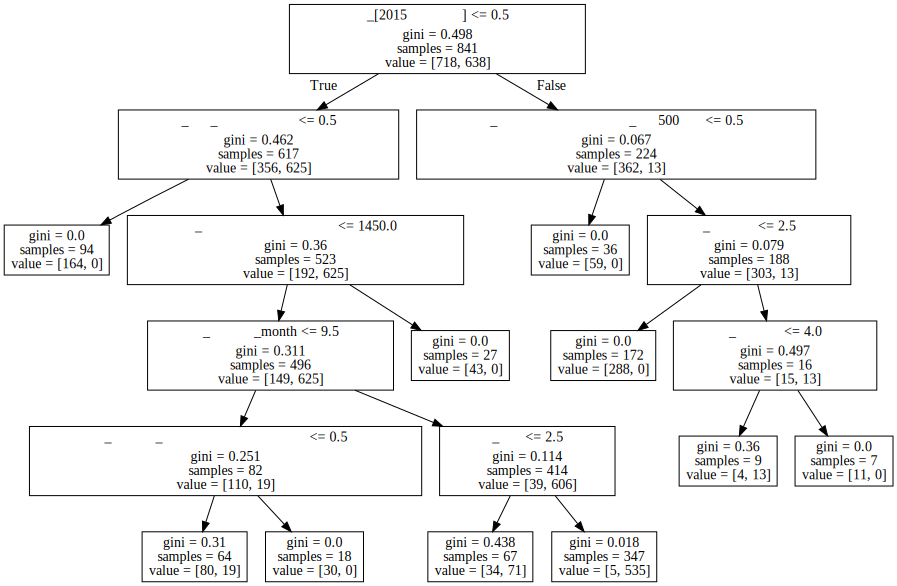

In [77]:
# 采用随机森林算法
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit

clf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=5, random_state=0)
# 由于原数据商务签违规的样本都聚集在一起，需要shuffle后再交叉验证
cv = ShuffleSplit(random_state=123, n_splits=10)  # 10折交叉验证
scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)  # 并行
print(scores.mean(), scores.std())
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

# 采用平衡后的数据
scores = cross_val_score(clf, X_upsample, y_upsample, cv=cv, scoring='f1', n_jobs=-1)
print(scores.mean(), scores.std())
clf.fit(X_upsample, y_upsample)
print(classification_report(y_test, clf.predict(X_test)))

# 可视化输出随机森林中树结果
from sklearn.tree import export_graphviz
import graphviz

tree0 = clf.estimators_[0]
dot_data = export_graphviz(tree0, out_file=None, feature_names=X_upsample.columns)
graph = graphviz.Source(dot_data)
graph

In [48]:
# 使用测试数据集验证
test = pd.read_csv('./case1/evaluation_swq.csv')
# 类型转换
test2 = conv_type(test)
# 日期类型处理
preprocess_dt_cols(test2, ['登记备案信息_成立日期', '登记备案信息_核准日期'])
# 丢弃无用列
test2 = drop_unused_cols(test2, ['Unnamed: 0', '评级', '登记备案信息_统一社会信用代码', '登记备案信息_成立日期', '登记备案信息_核准日期', '登记备案信息_核准日期_年月日', '实际联系人信息_联系人姓名'])
# 缺失值处理
test2 = preprocess_missing_value(test2)
# 类目值处理
test2 = pd.get_dummies(test2, columns=['登记备案信息_企业类型', '登记备案信息_年报情况'])
test2 = test2.reindex(columns=X_upsample.columns, fill_value=0)

clf.fit(X_upsample, y_upsample)
y_pred = clf.predict(test2)
len(y_pred[y_pred == 1])

45

In [56]:
# 采用AdaBoost算法
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=5, random_state=1)
scores = cross_val_score(clf, X_upsample, y_upsample, scoring='f1', n_jobs=-1)
print(scores.mean(), scores.std())
clf.fit(X_upsample, y_upsample)
print(classification_report(y_test, clf.predict(X_test)))

0.947514838927 0.0134732972391
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       168
          1       0.71      0.92      0.80        13

avg / total       0.97      0.97      0.97       181



In [57]:
# 采用XGboost算法
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=5, max_depth=3, learning_rate=0.1, random_state=123)
# xgboost不允许column name存在'[',']','<'字符
X_upsample2 = X_upsample.rename(columns={'国地税合并纳税情况_[2015年是否纳税]': '国地税合并纳税情况_2015年是否纳税', 
                                 '国地税合并纳税情况_[2016年是否纳税]': '国地税合并纳税情况_2016年是否纳税'})
X_test2 = X_test.rename(columns={'国地税合并纳税情况_[2015年是否纳税]': '国地税合并纳税情况_2015年是否纳税', 
                                 '国地税合并纳税情况_[2016年是否纳税]': '国地税合并纳税情况_2016年是否纳税'})
scores = cross_val_score(clf, X_upsample2, y_upsample, scoring='f1', n_jobs=-1)
print(scores.mean(), scores.std())
clf.fit(X_upsample2, y_upsample)
print(classification_report(y_test, clf.predict(X_test2)))

0.962316271853 0.00717756879631
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       168
          1       0.75      0.92      0.83        13

avg / total       0.98      0.97      0.97       181



In [62]:
# 采用SVM
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_upsample)
X_upsample_std = scaler.transform(X_upsample)
X_test_std = scaler.transform(X_test)

clf = GridSearchCV(SVC(), param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                                     {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 
                                      'kernel': ['rbf']}], 
                   scoring='recall', cv=cv, n_jobs=-1)
clf.fit(X_upsample_std, y_upsample)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=123, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']}, {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [59]:
svc = SVC(**clf.best_params_)
svc.fit(X_upsample_std, y_upsample)
print(classification_report(y_test, svc.predict(X_test_std)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       168
          1       1.00      0.85      0.92        13

avg / total       0.99      0.99      0.99       181



In [60]:
# 逻辑回归
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(Cs=5, cv=cv, scoring='f1', random_state=0)
clf.fit(X_upsample_std, y_upsample)
print(classification_report(y_test, clf.predict(X_test_std)))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97       168
          1       0.60      0.92      0.73        13

avg / total       0.97      0.95      0.96       181



In [61]:
# 随机梯度下降
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=100, learning_rate='optimal')
clf.fit(X_upsample_std, y_upsample)
print(classification_report(y_test, clf.predict(X_test_std)))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       168
          1       0.71      0.92      0.80        13

avg / total       0.97      0.97      0.97       181



In [66]:
# 自动选择合适分类器
from sklearn.pipeline import Pipeline

p = Pipeline([('clf', None)])
grid_search = GridSearchCV(p, param_grid=[{'clf': [SVC()], 'clf__C': [1, 10, 100], 
                                          'clf__gamma': [0.1, 0.01, 0.001], 'clf__kernel': ['rbf']},
                                         {'clf': [LogisticRegression()], 'clf__C': [0.1, 0.01, 0.001]},
                                         {'clf': [SGDClassifier(max_iter=100)]}],
                          scoring='f1', cv=cv)
grid_search.fit(X_upsample_std, y_upsample)
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('clf', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])